# CRO Algorithm

## max_ones problem

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from cro import *
np.random.seed(seed=69)

## ------------------------------------------------------
# Parameters initialization
Ngen = 400                 # Number of generations
N  = 40                    # Reef size 
Fb = 0.8                   # Broadcast prob.
Fa = 0.1                   # Asexual reproduction prob.
Fd = 0.1                   # Fraction of the corals to be eliminated in the depredation operator.
r0 = 0.7                   # Free/total initial proportion
k  = 3                     # Number of opportunities for a new coral to settle in the reef
Pd = 0.1                   # Depredation prob.
opt= 'max'                 # flag: 'max' for maximizing and 'min' for minimizing
L = 100
## ------------------------------------------------------

problem ='max_ones'

## run main inside a notebook

[*] Initialization:  max_ones max (%) 100 
Reef initialization: 63.0
Best-fitness: 63.0 
 0.0% completado 

Best-fitness: 84.0 
 25.0% completado 

Best-fitness: 93.0 
 50.0% completado 

Best-fitness: 97.0 
 75.0% completado 

Best-fitness: 100.0 
 100% completado 

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
100.0


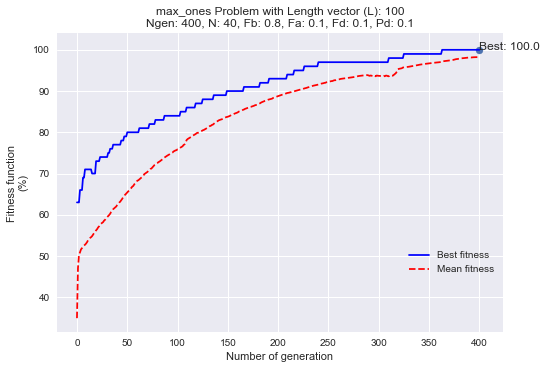

In [2]:
#Reef initialization
cro = CRO(Ngen, N, Fb, Fa, Fd, r0, k, Pd, opt, L, seed=13, problem_name=problem, metric='', dataset_name='', ml_problem='')
(REEF, REEFpob) = cro.reefinitialization ()
REEFfitness = cro.fitness(REEFpob)

Bestfitness = []
Meanfitness = []

ke_allowed = 0.2 #percentage allowed with equal values in extreme depredation
    
if opt=='max':
    print('Reef initialization:', np.max(REEFfitness))
    Bestfitness.append(np.max(REEFfitness))
else: 
    print('Reef initialization:', np.min(REEFfitness))
    Bestfitness.append(np.min(REEFfitness))
Meanfitness.append(np.mean(REEFfitness))
    
    
for n in range(Ngen):
    ESlarvae = cro.broadcastspawning(REEF, REEFpob)
    ISlarvae = cro.brooding(REEF, REEFpob, 'op_mutation')

    # larvae fitness
    ESfitness = cro.fitness(ESlarvae)
    ISfitness = cro.fitness(ISlarvae)

    # Larvae setting
    larvae = np.concatenate([ESlarvae,ISlarvae ],axis=1)
    larvaefitness = np.concatenate([ESfitness, ISfitness])
    (REEF, REEFpob, REEFfitness) = cro.larvaesetting(REEF, REEFpob, REEFfitness, larvae, larvaefitness)

    # Asexual reproduction
    (Alarvae, Afitness) = cro.budding(REEF, REEFpob, REEFfitness)
    (REEF, REEFpob, REEFfitness) = cro.larvaesetting(REEF, REEFpob, REEFfitness, Alarvae, Afitness)

    if n!=Ngen:
        (REEF, REEFpob, REEFfitness) = cro.depredation(REEF, REEFpob, REEFfitness)    
        ke = int(np.round(ke_allowed*N*N))
        (REEF, REEFpob, REEFfitness) = cro.extremedepredation(REEF, REEFpob, REEFfitness, ke)

    if opt=='max': Bestfitness.append(np.max(REEFfitness))
    else: Bestfitness.append(np.min(REEFfitness))              
    Meanfitness.append(np.mean(REEFfitness))

    if (n%100==0) & (n!=Ngen):
        if opt=='max': print('Best-fitness:', np.max(REEFfitness), '\n', str(n/Ngen*100) + '% completado \n' );
        else: 
            print('Best-fitness:', np.min(REEFfitness), '\n', str(n/Ngen*100) + '% completado \n' );

if opt=='max':
    print('Best-fitness:', np.max(REEFfitness), '\n', str(100) + '% completado \n' ) 
    ind_best = np.where(REEFfitness == np.max(REEFfitness))[0][0]
else:
    print('Best-fitness:', np.min(REEFfitness), '\n', str(100) + '% completado \n' ) 
    ind_best = np.where(REEFfitness == np.min(REEFfitness))[0][0]

print(REEFpob[:, ind_best])
print(REEFfitness[ind_best])

if problem=='feature_selection': print(cro.dataset_names(REEFpob[:, ind_best]))

cro.plot_results( REEF, REEFpob, REEFfitness, Bestfitness, Meanfitness)

## feature selection (Classification ML)

In [3]:
## ------------------------------------------------------
# Parameters initialization
Ngen = 80                # Number of generations
N = 10                     # Reef size 
Fb = 0.8                   # Broadcast prob.
Fa = 0.3                   # Asexual reproduction prob.
Fd = 0.1                   # Fraction of the corals to be eliminated in the depredation operator.
r0 = 0.6                   # Free/total initial proportion
k  = 3                     # Number of opportunities for a new coral to settle in the reef
Pd = 0.1                   # Depredation prob.
opt= 'max'                 # flag: 'max' for maximizing and 'min' for minimizing
L = 3 # dont used
## ------------------------------------------------------

problem ='feature_selection'
metric = 'auc'
dataset_name = 'voice'
ml_problem='classification'

[*] Initialization:  feature_selection max auc 30 voice
Reef initialization: 0.685116630841
Best-fitness: 0.697735052942 
 0.0% completado 

Best-fitness: 0.738615556086 
 12.5% completado 

Best-fitness: 0.914994825253 
 25.0% completado 

Best-fitness: 0.968493750498 
 37.5% completado 

Best-fitness: 0.974802961548 
 50.0% completado 

Best-fitness: 0.974802961548 
 62.5% completado 

Best-fitness: 0.9873815779 
 75.0% completado 

Best-fitness: 0.9873815779 
 87.5% completado 

Best-fitness: 0.9873815779 
 100% completado 

[0 1 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
0.9873815779
['sd' 'Q25' 'centroid' 'meanfun' 'minfun' 'mindom']


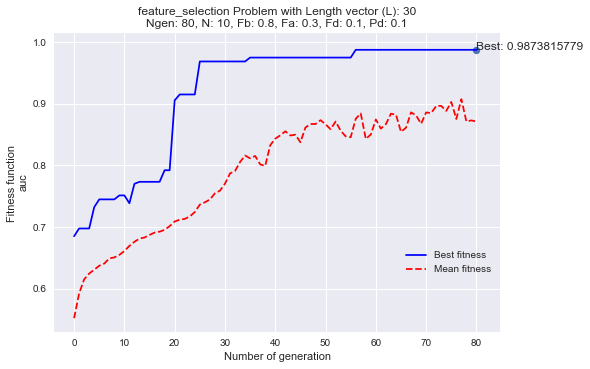

In [4]:
#Reef initialization
cro = CRO(Ngen, N, Fb, Fa, Fd, r0, k, Pd, opt, L, seed=13, problem_name=problem, metric=metric, dataset_name=dataset_name, ml_problem=ml_problem)
(REEF, REEFpob) = cro.reefinitialization ()
REEFfitness = cro.fitness(REEFpob)

Bestfitness = []
Meanfitness = []

ke_allowed = 0.2 #percentage allowed with equal values in extreme depredation
    
if opt=='max':
    print('Reef initialization:', np.max(REEFfitness))
    Bestfitness.append(np.max(REEFfitness))
else: 
    print('Reef initialization:', np.min(REEFfitness))
    Bestfitness.append(np.min(REEFfitness))
Meanfitness.append(np.mean(REEFfitness))
    
    
for n in range(Ngen):
    ESlarvae = cro.broadcastspawning(REEF, REEFpob)
    ISlarvae = cro.brooding(REEF, REEFpob, 'op_mutation')

    # larvae fitness
    ESfitness = cro.fitness(ESlarvae)
    ISfitness = cro.fitness(ISlarvae)

    # Larvae setting
    larvae = np.concatenate([ESlarvae,ISlarvae ],axis=1)
    larvaefitness = np.concatenate([ESfitness, ISfitness])
    (REEF, REEFpob, REEFfitness) = cro.larvaesetting(REEF, REEFpob, REEFfitness, larvae, larvaefitness)

    # Asexual reproduction
    (Alarvae, Afitness) = cro.budding(REEF, REEFpob, REEFfitness)
    (REEF, REEFpob, REEFfitness) = cro.larvaesetting(REEF, REEFpob, REEFfitness, Alarvae, Afitness)

    if n!=Ngen:
        (REEF, REEFpob, REEFfitness) = cro.depredation(REEF, REEFpob, REEFfitness)    
        ke = int(np.round(ke_allowed*N*N))
        (REEF, REEFpob, REEFfitness) = cro.extremedepredation(REEF, REEFpob, REEFfitness, ke)

    if opt=='max': Bestfitness.append(np.max(REEFfitness))
    else: Bestfitness.append(np.min(REEFfitness))              
    Meanfitness.append(np.mean(REEFfitness))

    if (n%10==0) & (n!=Ngen):
        if opt=='max': print('Best-fitness:', np.max(REEFfitness), '\n', str(n/Ngen*100) + '% completado \n' );
        else: 
            print('Best-fitness:', np.min(REEFfitness), '\n', str(n/Ngen*100) + '% completado \n' );

if opt=='max':
    print('Best-fitness:', np.max(REEFfitness), '\n', str(100) + '% completado \n' ) 
    ind_best = np.where(REEFfitness == np.max(REEFfitness))[0][0]
else:
    print('Best-fitness:', np.min(REEFfitness), '\n', str(100) + '% completado \n' ) 
    ind_best = np.where(REEFfitness == np.min(REEFfitness))[0][0]

print(REEFpob[:, ind_best])
print(REEFfitness[ind_best])

if problem=='feature_selection': print(cro.dataset_names(REEFpob[:, ind_best]))

cro.plot_results( REEF, REEFpob, REEFfitness, Bestfitness, Meanfitness)